# $$\text{Practical 6}$$

## Name : Yashkumar Jain
## Roll no : 71
## Batch : E4
## Subject : DVA Lab

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
data = pd.read_csv('/content/smoking.csv')

# Define a user-defined function for Chi-square test
def chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# Define user-defined function to calculate expected frequencies
def expected_frequencies(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    expected_freq = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / contingency_table.sum().sum()
    return expected_freq

# Perform Chi-square test and calculate expected frequencies
chi2_stat, p_value = chi_square_test(data, 'Country', 'Year')
expected_freq = expected_frequencies(data, 'Country', 'Year')

# Calculate degrees of freedom
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Determine the critical Chi-square value
critical_value = chi2_contingency(np.identity(contingency_table.shape[0]))[0]

# Determine if the Chi-square statistic is significant
if chi2_stat > critical_value:
    print("Chi-square statistic is significant, reject null hypothesis")
else:
    print("Chi-square statistic is not significant, fail to reject null hypothesis")

# Verify with standard functions
chi2_stat_standard, p_value_standard, _, _ = chi2_contingency(contingency_table)
print("\nUsing Standard Functions:")
print("Chi-square statistic:", chi2_stat_standard)
print("P-value:", p_value_standard)

Chi-square statistic is not significant, fail to reject null hypothesis

Using Standard Functions:
Chi-square statistic: 103.62761815252416
P-value: 4.3870167312639317e-20


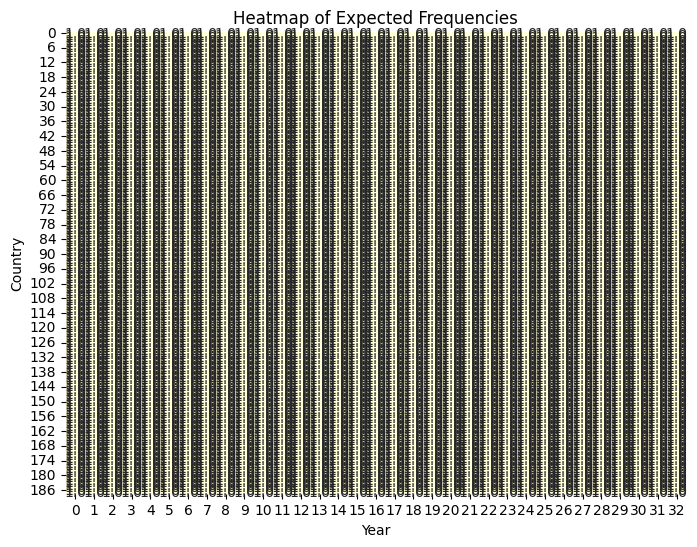

In [14]:
# Plot a heatmap to visualize the results
plt.figure(figsize=(8, 6))
sns.heatmap(expected_freq, annot=True, cmap='YlGnBu', fmt=".1f", cbar=False)
plt.title("Heatmap of Expected Frequencies")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()
